In [1]:
import pickle
import pandas as pd
import numpy as np
import detectda as dtda
import matplotlib.pyplot as plt
from skimage import filters
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import sys
from joblib import Parallel, delayed
from scipy.stats import mode

In [2]:
names_exp4_df = ['cp_bcc', 'bcc_beta1', 'bcc_beta2', 'bcc_beta3', 'bcc_beta4', 'bcc_beta5',
                'rmse_bcc', 'cp_cf', 'pval_cf', 'cp_kcp', 'cp_kcp_std', 'cp_ecp', 'cp_ecp_std', 'cp_mean']
exp4_df = pd.read_table('experiment4_data.txt', sep=',', header=None, names=names_exp4_df)

In [3]:
exp4_df.shape

(2500, 14)

In [4]:
print('P. Exact BCLR: %0.3f' % np.mean(exp4_df['cp_bcc']==350))

print('P. Exact CF: %0.3f' % np.mean(exp4_df['cp_cf']==350))

print('P. Exact KCP: %0.3f' % np.mean(exp4_df['cp_kcp']==350))

print('P. Exact KCP STD: %0.3f' % np.mean(exp4_df['cp_kcp_std']==350))

print('P. Exact ECP: %0.3f' % np.mean(exp4_df['cp_ecp']==350))

print('P. Exact ECP STD: %0.3f' % np.mean(exp4_df['cp_ecp_std']==350))

print('P. Exact MEAN: %0.3f' % np.mean(exp4_df['cp_mean']==350))

P. Exact BCLR: 0.260
P. Exact CF: 0.216
P. Exact KCP: 0.102
P. Exact KCP STD: 0.266
P. Exact ECP: 0.003
P. Exact ECP STD: 0.275
P. Exact MEAN: 0.020


In [21]:
print('P. Exact BCLR: %0.3f' % (np.std(exp4_df['cp_bcc']==350)/50))

print('P. Exact CF: %0.3f' % (np.std(exp4_df['cp_cf']==350)/50))

print('P. Exact KCP: %0.3f' % (np.std(exp4_df['cp_kcp']==350)/50))

print('P. Exact KCP STD: %0.3f' % (np.std(exp4_df['cp_kcp_std']==350)/50))

print('P. Exact ECP: %0.3f' % (np.std(exp4_df['cp_ecp']==350)/50))

print('P. Exact ECP STD: %0.3f' % (np.std(exp4_df['cp_ecp_std']==350)/50))

print('P. Exact MEAN: %0.3f' % (np.std(exp4_df['cp_mean']==350)/50))

P. Exact BCLR: 0.009
P. Exact CF: 0.008
P. Exact KCP: 0.006
P. Exact KCP STD: 0.009
P. Exact ECP: 0.001
P. Exact ECP STD: 0.009
P. Exact MEAN: 0.003


In [24]:
print('RMSE BCLR: %0.3f' % np.mean(exp4_df['rmse_bcc']))

print('RMSE CF: %0.3f' % np.sqrt(np.mean((exp4_df['cp_cf']-350)**2)))

print('RMSE KCP: %0.3f' % np.sqrt(np.mean((exp4_df['cp_kcp']-350)**2)))

print('RMSE KCP STD: %0.3f' % np.sqrt(np.mean((exp4_df['cp_kcp_std']-350)**2)))

print('RMSE ECP: %0.3f' % np.sqrt(np.mean((exp4_df['cp_ecp']-350)**2)))

print('RMSE ECP STD: %0.3f' % np.sqrt(np.mean((exp4_df['cp_ecp_std']-350)**2)))

print('RMSE MEAN: %0.3f' % np.sqrt(np.mean((exp4_df['cp_mean']-350)**2)))

RMSE BCLR: 6.796
RMSE CF: 11.306
RMSE KCP: 54.153
RMSE KCP STD: 6.581
RMSE ECP: 167.851
RMSE ECP STD: 6.375
RMSE MEAN: 182.753


In [26]:
np.std(exp4_df['rmse_bcc'])

5.436651374725569

In [9]:
exp4_df.median()

cp_bcc        349.000000
bcc_beta1      -0.750830
bcc_beta2       0.327116
bcc_beta3      -0.002833
bcc_beta4      -0.000269
bcc_beta5       0.001309
rmse_bcc        5.209256
cp_cf         350.000000
pval_cf         0.005000
cp_kcp        350.000000
cp_kcp_std    350.000000
cp_ecp        323.000000
cp_ecp_std    350.000000
cp_mean       346.500000
dtype: float64

In [10]:
exp4_df.iloc[:, 1:6].to_numpy()

array([[-0.77746668,  0.30172657, -0.03955612, -0.09174445, -0.27050252],
       [-0.70228412,  0.39965917, -0.13219989,  0.26415268,  0.10271429],
       [-0.81245843,  0.29900179, -0.00616297,  0.00860656,  0.08285122],
       ...,
       [-0.86618597,  0.39181739,  0.08353874, -0.01353673,  0.05673851],
       [-0.83934633,  0.2626963 , -0.03227819,  0.06738238,  0.04798791],
       [-0.62093813,  0.53695645, -0.18342984,  0.0178554 , -0.11854228]])

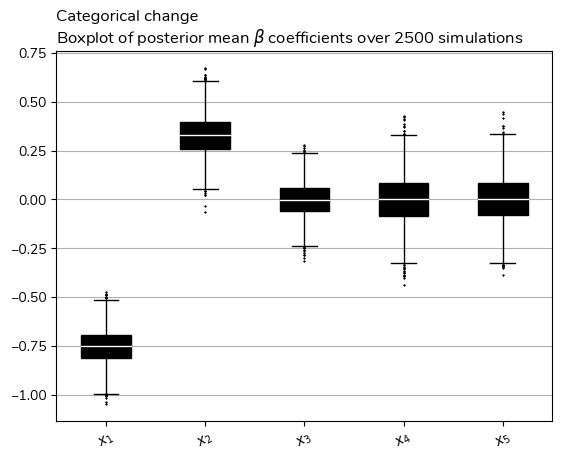

In [23]:
plt.rcParams["font.family"] = "Nunito"

names = [r'$x_1$', r'$x_2$', r'$x_3$', r'$x_4$', r'$x_5$']

fig, ax = plt.subplots()
ax.yaxis.grid(True)
bp = ax.boxplot(x=exp4_df.iloc[:, 1:6].to_numpy(), labels=names, sym='*', patch_artist=True)
plt.setp(bp['fliers'], markersize=1.0)
plt.xticks(rotation=30)
plt.setp(bp["boxes"], facecolor="black")
plt.setp(bp["medians"], color="white")
ax.set_title("Categorical change\nBoxplot of posterior mean "+str(r'$\beta$')+" coefficients over 2500 simulations", loc='left')
plt.savefig("BoxplotMixed.pdf")